# 임베딩을 사용한 비지도 클러스터링 및 명명된 클러스터 (그리고 기타 재미있는 작업)

이 노트북에서는 [Top 10000 Popular Movies Dataset](https://www.kaggle.com/datasets/db55ac3dfd0098a0cf96dd542807f9253a16587ff233e06baef372bccfd09942)의 하위 집합을 사용하여 영화 설명에 대한 임베딩을 계산한 후 k-means를 적용하여 유사한 클러스터를 찾습니다.  
클러스터를 얻은 후에는 프롬프트를 사용하여 각 클러스터의 주제를 추출합니다.

## 머신러닝 학습 방법의 종류

머신러닝은 학습 방식에 따라 크게 4가지로 분류됩니다. 이 노트북에서는 **비지도 학습(Unsupervised Learning)**을 사용합니다.

### 1️⃣ 비지도 학습 (Unsupervised Learning)
**레이블(정답) 없이 데이터의 패턴을 스스로 발견하는 학습**

**특징:**
- ✅ 레이블이 필요 없음 (비용 절감)
- ✅ 숨겨진 패턴 발견
- ❌ 결과 해석이 어려울 수 있음

**주요 기법:**
- **클러스터링**: K-means, DBSCAN, 계층적 클러스터링
- **차원 축소**: PCA, t-SNE, UMAP
- **이상 탐지**: Isolation Forest, One-Class SVM

**활용 사례:**
```
- 고객 세분화 (Customer Segmentation)
- 추천 시스템 (Recommendation System)
- 이상 거래 탐지 (Anomaly Detection)
- 데이터 시각화 및 탐색
```

**이 노트북의 예시:**
- 영화를 5개 클러스터로 자동 분류 (K-means)
- 고차원 임베딩을 2D로 시각화 (t-SNE)

---

### 2️⃣ 지도 학습 (Supervised Learning)
**레이블(정답)이 있는 데이터로 학습하여 예측 모델을 만드는 학습**

**특징:**
- ✅ 명확한 목표와 평가 기준
- ✅ 높은 정확도
- ❌ 레이블 작업 비용이 큼

**주요 기법:**
- **분류 (Classification)**: 로지스틱 회귀, 결정 트리, Random Forest, SVM, 신경망
- **회귀 (Regression)**: 선형 회귀, Ridge, Lasso, XGBoost

**활용 사례:**
```
- 스팸 메일 필터링 (분류)
- 질병 진단 (분류)
- 주택 가격 예측 (회귀)
- 매출 예측 (회귀)
```

---

### 3️⃣ 자기 지도 학습 (Self-Supervised Learning)
**데이터 자체에서 레이블을 자동으로 생성하여 학습하는 방법**

**특징:**
- ✅ 대규모 비레이블 데이터 활용
- ✅ 사전학습(Pre-training)에 효과적
- ✅ 레이블 비용 절감

**주요 기법:**
- **Masked Language Modeling**: 문장에서 단어를 가리고 예측 (BERT, GPT)
- **Contrastive Learning**: 유사한 데이터는 가깝게, 다른 데이터는 멀게 (SimCLR, MoCo)
- **Autoencoder**: 입력을 압축했다가 복원

**활용 사례:**
```
- 대규모 언어 모델 사전학습 (GPT, BERT)
- 이미지 표현 학습 (ResNet, Vision Transformer)
- 음성 인식 모델 사전학습
```

---

### 4️⃣ 강화 학습 (Reinforcement Learning)
**환경과 상호작용하며 보상을 최대화하는 행동을 학습**

**특징:**
- ✅ 순차적 의사결정 문제에 강함
- ✅ 시행착오를 통한 학습
- ❌ 학습이 불안정하고 느림

**주요 개념:**
- **에이전트(Agent)**: 학습하는 주체
- **환경(Environment)**: 에이전트가 상호작용하는 세계
- **행동(Action)**: 에이전트의 선택
- **보상(Reward)**: 행동에 대한 피드백

**주요 기법:**
- Q-Learning, DQN (Deep Q-Network)
- Policy Gradient, PPO (Proximal Policy Optimization)
- Actor-Critic, A3C

**활용 사례:**
```
- 게임 AI (AlphaGo, Dota 2)
- 자율주행 자동차
- 로봇 제어
- 추천 시스템 최적화
- 대화형 AI (ChatGPT의 RLHF)
```

---

## 📊 학습 방법 비교표

| 학습 방법 | 레이블 필요 | 주요 용도 | 장점 | 단점 |
|----------|----------|---------|------|------|
| **비지도 학습** | 없음 | 패턴 발견, 클러스터링 | 레이블 비용 없음 | 해석 어려움 |
| **지도 학습** | 필요 | 분류, 예측 | 높은 정확도 | 레이블 비용 큼 |
| **자기 지도 학습** | 자동 생성 | 대규모 사전학습 | 확장성 좋음 | 특정 도메인 전문성 부족 |
| **강화 학습** | 보상 신호 | 의사결정, 제어 | 복잡한 전략 학습 | 학습 불안정, 느림 |

---

## 🎯 이 노트북에서 사용하는 방법

이 노트북은 **비지도 학습(Unsupervised Learning)**을 사용합니다:

1. **임베딩 생성**: 영화 설명 → 벡터 변환
2. **K-means 클러스터링**: 유사한 영화 자동 그룹화 (레이블 없음)
3. **t-SNE 시각화**: 고차원 데이터 → 2D 시각화
4. **추천 시스템**: 코사인 유사도로 유사 영화 추천

레이블이 없는 상태에서 영화의 패턴을 발견하고 자동으로 분류합니다!

In [2]:
# scikit-learn: 머신러닝 라이브러리
# K-means 클러스터링, t-SNE 시각화에 사용
!pip install scikit-learn

In [3]:
import os
import tiktoken
import openai
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from openai import AzureOpenAI

from tenacity import retry, wait_random_exponential, stop_after_attempt

# Load environment variables
load_dotenv(override=True)

client = AzureOpenAI(
  azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT"), 
  api_key=os.getenv("AZURE_OPENAI_KEY"),  
  api_version="2024-12-01-preview"
)

def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


# Define embedding model and encoding
EMBEDDING_MODEL = os.getenv("EMBEDDING_MODEL_NAME")
model = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")

encoding = tiktoken.get_encoding('cl100k_base')

`movies.csv`를 로드합니다:

In [4]:
df = pd.read_csv('data/movies.csv')
print(df.shape)
df.head(3)

(500, 12)


,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,381284.0,en,Hidden Figures,49.802,2016-12-10,8.1,7310.0,"['Drama', 'History']","The untold story of Katherine G. Johnson, Doro...",2.306988e+08,127.0,"Meet the women you don't know, behind the miss..."
1,356334.0,en,Gridlocked,9.801,2016-06-14,5.8,130.0,['Action'],Former SWAT leader David Hendrix and hard-part...,0.000000e+00,114.0,Only one way out…
2,475557.0,en,Joker,116.462,2019-10-02,8.2,18970.0,"['Crime', 'Thriller', 'Drama']","During the 1980s, a failed stand-up comedian i...",1.074251e+09,122.0,Put on a happy face.


다음으로, 새로운 열을 생성하고 각 임베딩에 필요한 토큰 수를 계산해 봅시다. 이를 통해 전체 데이터셋에 대해 임베딩을 생성하는 데 드는 비용을 추정할 수 있습니다.

In [5]:
# add a new column to the dataframe where you put the token count of the review
df = df.assign(token_count=df['overview'].apply(lambda x: len(encoding.encode(x))))

# print the first 5 rows of the dataframe, then also the total number of tokens
total_tokens = df['token_count'].sum()

cost_for_embeddings = total_tokens / 1000 * 0.0001
print(f"Test would cost ${cost_for_embeddings} for embeddings")

Test would cost $0.0029391 for embeddings


임베딩 메서드를 정의해 봅시다. Azure OpenAI 서비스의 TPS 제한에 도달할 경우를 대비하여 자동 재시도 메커니즘을 제공하는 tenacity의 사용에 주목하세요.

In [6]:
@retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(10))
def get_embedding(text) -> list[float]:
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=EMBEDDING_MODEL).data[0].embedding
 

임베딩을 생성해 봅시다:

In [7]:
df = df.assign(embedding=df['overview'].apply(lambda x: get_embedding(x)))
df.head(6)

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline,token_count,embedding
0,381284.0,en,Hidden Figures,49.802,2016-12-10,8.1,7310.0,"['Drama', 'History']","The untold story of Katherine G. Johnson, Doro...",2.306988e+08,127.0,"Meet the women you don't know, behind the miss...",62,"[-0.016805129125714302, -0.01393564697355032, ..."
1,356334.0,en,Gridlocked,9.801,2016-06-14,5.8,130.0,['Action'],Former SWAT leader David Hendrix and hard-part...,0.000000e+00,114.0,Only one way out…,35,"[-0.006607969291508198, -0.02256608009338379, ..."
2,475557.0,en,Joker,116.462,2019-10-02,8.2,18970.0,"['Crime', 'Thriller', 'Drama']","During the 1980s, a failed stand-up comedian i...",1.074251e+09,122.0,Put on a happy face.,36,"[-0.011366992257535458, -0.028693873435258865,..."
3,347847.0,en,The Sand,14.172,2015-08-28,5.1,157.0,['Horror'],Just when you thought it was safe to go back i...,0.000000e+00,84.0,This Beach is Killer,124,"[-0.0013119977666065097, -0.03693384677171707,..."
4,739542.0,en,America: The Motion Picture,98.542,2021-06-30,5.8,130.0,"['Action', 'Comedy', 'History', 'Animation', '...",A chainsaw-wielding George Washington teams wi...,0.000000e+00,98.0,This summer they're redrawing history.,32,"[-0.006472007371485233, -0.020479165017604828,..."
5,505262.0,ja,僕のヒーローアカデミア THE MOVIE ～2人の英雄～,220.805,2018-08-03,8.0,677.0,"['Animation', 'Action', 'Adventure', 'Fantasy']",All Might and Deku accept an invitation to go ...,3.147883e+07,96.0,Who is your hero?,98,"[0.005911096930503845, -0.031393833458423615, ..."


다음으로, KMeans를 사용하여 임베딩에 클러스터를 생성합니다. 이 경우, 5개의 클러스터를 선택하지만, 이것이 정확하지 않을 수도 있습니다.

In [12]:
# train k-means on df embeddings
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(df['embedding'].to_list())
df = df.assign(cluster=kmeans.labels_)
df.head(10)

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline,token_count,embedding,cluster
0,381284.0,en,Hidden Figures,49.802,2016-12-10,8.1,7310.0,"['Drama', 'History']","The untold story of Katherine G. Johnson, Doro...",2.306988e+08,127.0,"Meet the women you don't know, behind the miss...",62,"[-0.016805129125714302, -0.01393564697355032, ...",0
1,356334.0,en,Gridlocked,9.801,2016-06-14,5.8,130.0,['Action'],Former SWAT leader David Hendrix and hard-part...,0.000000e+00,114.0,Only one way out…,35,"[-0.006607969291508198, -0.02256608009338379, ...",4
2,475557.0,en,Joker,116.462,2019-10-02,8.2,18970.0,"['Crime', 'Thriller', 'Drama']","During the 1980s, a failed stand-up comedian i...",1.074251e+09,122.0,Put on a happy face.,36,"[-0.011366992257535458, -0.028693873435258865,...",1
3,347847.0,en,The Sand,14.172,2015-08-28,5.1,157.0,['Horror'],Just when you thought it was safe to go back i...,0.000000e+00,84.0,This Beach is Killer,124,"[-0.0013119977666065097, -0.03693384677171707,...",3
4,739542.0,en,America: The Motion Picture,98.542,2021-06-30,5.8,130.0,"['Action', 'Comedy', 'History', 'Animation', '...",A chainsaw-wielding George Washington teams wi...,0.000000e+00,98.0,This summer they're redrawing history.,32,"[-0.006472007371485233, -0.020479165017604828,...",4
5,505262.0,ja,僕のヒーローアカデミア THE MOVIE ～2人の英雄～,220.805,2018-08-03,8.0,677.0,"['Animation', 'Action', 'Adventure', 'Fantasy']",All Might and Deku accept an invitation to go ...,3.147883e+07,96.0,Who is your hero?,98,"[0.005911096930503845, -0.031393833458423615, ...",0
6,3512.0,en,Under Siege 2: Dark Territory,19.217,1995-07-13,5.7,608.0,"['Action', 'Thriller']",A passenger train has been hijacked by an elec...,1.043241e+08,100.0,Last time he rocked the boat. This time the sk...,48,"[-0.01933574303984642, 0.002167288213968277, -...",4
7,10649.0,en,The Enforcer,14.938,1976-12-20,6.9,599.0,"['Action', 'Crime', 'Thriller']","Dirty Harry Callahan returns again, this time ...",4.623600e+07,96.0,The dirtiest Harry of them all.,31,"[-0.025958223268389702, -0.040821827948093414,...",4
8,103332.0,en,Ruby Sparks,14.750,2012-07-25,7.1,1249.0,"['Comedy', 'Romance', 'Fantasy', 'Drama']",Calvin is a young novelist who achieved phenom...,9.128263e+06,104.0,She's Out Of His Mind,82,"[-0.002566759940236807, -0.03235512226819992, ...",2
9,180296.0,en,They Came Together,9.290,2014-06-27,5.6,306.0,['Comedy'],A small business owner is about to lose her sh...,0.000000e+00,83.0,He came...She came...They both came,16,"[-0.01819261908531189, -0.02455485239624977, 0...",2


이제 각 행에 클러스터가 있으므로 t-SNE를 사용하여 임베딩을 2차원 공간으로 투영하고 클러스터를 시각화해 봅시다.

(500, 1536)


/tmp/ipykernel_13283/2572688562.py:20: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/home/yoonpyohong/project/azure-ai-workshop/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_13283/2572688562.py:21: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


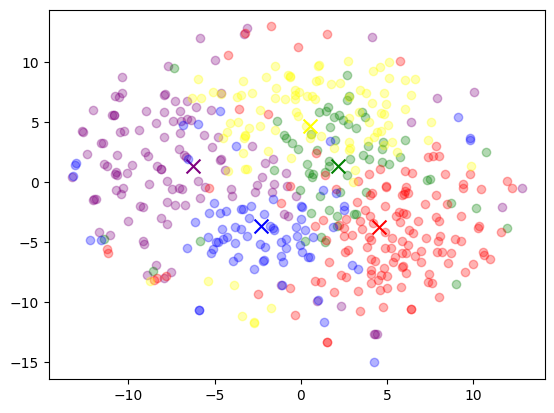

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(
    n_components=2, perplexity=50, random_state=42, init="random", learning_rate=200
)

matrix = np.vstack(df.embedding.values)
print(matrix.shape)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue","yellow", 'black', 'orange', 'brown', 'pink', 'grey']):
    xs = np.array(x)[df.cluster == category]
    ys = np.array(y)[df.cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)

음, 예상했던 대로 그다지 좋아 보이지는 않습니다. 우리는 모든 종류의 영화를 가지고 있으며, 단 5개의 클러스터만으로는 이상적이지 않을 수 있습니다.  
하지만 자세히 보면 클러스터를 닮은 대략적인 모양을 만들 수 있습니다. 또한 영화는 두 개 이상의 카테고리에 속할 수 있으므로 어느 정도 말이 됩니다.

마지막으로, 각 클러스터에서 몇 가지 예를 가져와 OpenAI에 보내고 공통 주제를 추출해 봅시다:

In [10]:
# take 10 movies from each cluster and write a prompt that asks what these have in common
# ideally you would use more movies than 10, but this is just a demo


for i in range(n_clusters):
    reviews = df[df['cluster'] == i]['overview'].sample(10)
    reviews = "\n".join(reviews.values.tolist())
    
    prompt = f"다음은 10개의 영화 설명입니다: \n{reviews}이들의 공통점을 세 단어로 적어 보세요."
    print(prompt)
    response = client.chat.completions.create(
        model=model, 
        messages = [
                        {"role":"system", "content":"You are a helpful assistant."},
                        {"role":"user","content":prompt}
                    ])
    topic_content = response.choices[0].message.content                

    print(f"Cluster {i} topics: {topic_content}")
    movies = df[df['cluster'] == i]['original_title'].sample(25)
    print(f"Movies from cluster {i}: {', '.join(movies.values.tolist())}")
    print("================")    

다음은 10개의 영화 설명입니다: 
Led by a strange dream, scientist Aki Ross struggles to collect the eight spirits in the hope of creating a force powerful enough to protect the planet. With the aid of the Deep Eyes Squadron and her mentor, Dr. Sid, Aki must save the Earth from its darkest hate and unleash the spirits within.
Minions Stuart, Kevin and Bob are recruited by Scarlet Overkill, a super-villain who, alongside her inventor husband Herb, hatches a plot to take over the world.
Ukraine, 1919. The friendship of two boys, Anton and Jacob, one Christian, the other Jewish, manages to survive the prejudices and hatred that dominate the minds of adults in the aftermath of World War I and the Russian Revolution.
Freshly hatched bee Maya is a little whirlwind and won't follow the rules of the hive. One of these rules is not to trust the hornets that live beyond the meadow. When the Royal Jelly is stolen, the hornets are suspected and Maya is thought to be their accomplice. No one believes that she i

그렇게 나쁘지 않아 보입니다. 하지만 다시 말하지만, 각 클래스에 대해 10개의 샘플만 사용하는 것은 클러스터 수가 적다는 점을 고려할 때 충분하지 않을 수 있습니다. 어쨌든 영화 제목을 보면 일부 주제가 실제로 꽤 괜찮게 보입니다.

# 임베딩을 사용하여 간단한 추천 시스템 구축

또 다른 작업으로는 임베딩을 사용하여 매우 간단한 추천 시스템을 구축하는 것입니다. 한 번 시도해 봅시다:

In [11]:
# Let's pick a movie that exists in df, keeping in mind we only have 500 movies in it!
movie = "Frozen"

# get embedding for movie
e = df[df['original_title'] == movie]['embedding'].values[0]

# get cosine similarity between movie and all other movies and sort ascending
similarities = df['embedding'].apply(lambda x: cosine_similarity(x, e))

# get most similar movies
movies = df.assign(similarity=similarities).sort_values(by='similarity', ascending=False)[['original_title', 'similarity', 'overview']]
movies[0:6]

,original_title,similarity,overview
480,Frozen,1.000000,Young princess Anna of Arendelle dreams about ...
361,The Huntsman: Winter's War,0.861227,As two evil sisters prepare to conquer the lan...
468,The Swan Princess,0.856962,The beautiful princess Odette is transformed i...
161,Beauty and the Beast,0.848221,A live-action adaptation of Disney's version o...
173,Cinderella,0.841805,"When her father unexpectedly passes away, youn..."
286,Wonder Woman,0.841401,An Amazon princess comes to the world of Man i...


마지막 것을 제외하고는 실제로 꽤 괜찮아 보입니다... 아마도 추천에 영화 카테고리와 연령 등급을 추가했다면 더 유용했을 것입니다... :)

---

## 🎯 임베딩을 활용한 실전 사용 사례

이 노트북에서 배운 임베딩 기술을 다양한 실제 비즈니스 문제에 적용할 수 있습니다. 아래는 임베딩을 활용한 주요 사용 사례입니다.

### 1 **콘텐츠 기반 추천 시스템**
**이 노트북에서 구현한 것과 동일한 방식**

**활용 분야:**
- **이커머스**: 유사한 상품 추천 ("이 상품과 비슷한 상품")
- **스트리밍 서비스**: Netflix, YouTube 스타일 콘텐츠 추천
- **뉴스 플랫폼**: 읽고 있는 기사와 유사한 기사 추천
- **음악 서비스**: 비슷한 곡, 아티스트 추천

---

### 2 **시맨틱 검색 (Semantic Search)**
**키워드가 아닌 "의미" 기반 검색**

**활용 분야:**
- **기업 문서 검색**: 내부 지식베이스, 매뉴얼 검색
- **법률 문서 검색**: 유사 판례, 법률 조항 검색
- **학술 논문 검색**: 주제가 유사한 논문 찾기
- **FAQ 시스템**: 질문의 의미를 이해하여 답변 매칭

**장점:**
- 동의어, 유사 표현 자동 인식
- 다국어 검색 가능
- 오타에 강함

---

### 3 **다국어 검색**
**언어가 달라도 의미가 같으면 검색 가능**

**활용 분야:**
- **글로벌 이커머스**: 한국어 검색 → 영어 상품도 검색
- **다국어 고객 지원**: 어떤 언어로 질문해도 답변 가능
- **국제 뉴스 서비스**: 언어 경계 없는 기사 추천
- **번역 없는 정보 접근**: 외국 문서 직접 검색

---

임베딩은 현대 AI 시스템의 핵심 기술입니다! 🚀